In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys
sys.path.append("..")

import numpy as np
import healpy as hp
from astropy.io import fits
from pprint import pprint
from tqdm import tqdm
from scipy import interpolate

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file("../notebooks/matplotlibrc")

## counts

In [18]:
counts_gcepy = np.load(f"../data/external/gcepy/inputs/utils/fermi_w009_to_w670_front_only_14_Ebin_20x20window_normal.npy")

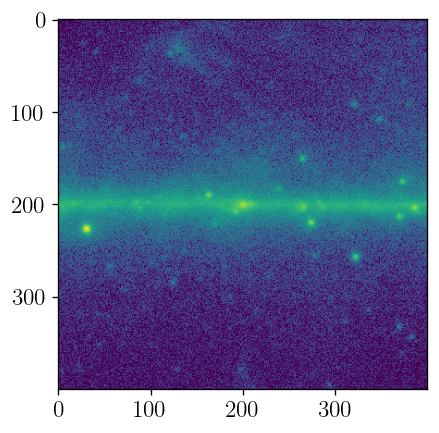

In [26]:
plt.imshow(np.log(np.flipud(np.clip(counts_gcepy[5], 0.5, None))))

## Normalization mask

In [36]:
import utils.create_mask as cm
from utils.cart import to_cart

In [40]:
norm_mask_hp = np.asarray(
    cm.make_mask_total(
        nside=512,
        band_mask=True,
        band_mask_range=2,
        mask_ring=True,
        inner=0,
        outer=25,
    )
)
norm_mask_cart = to_cart(norm_mask_hp, n_pixels=400, pixelsize=0.1) > 0

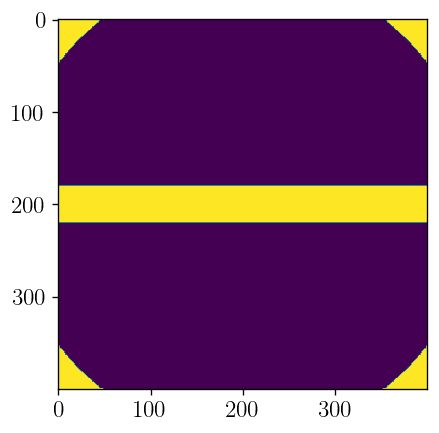

In [41]:
plt.imshow(np.flipud(norm_mask_cart))

## Bulge: Coleman 2019

In [2]:
hdu = fits.open("../data/bulge_templates/Bulge_modulated_Coleman_etal_2019_Normalized.fits")[0]

In [ ]:
hdu.header

In [3]:
bin_edges_lowres = np.linspace(0, 40, 201)
bin_centers_lowres = (bin_edges_lowres[:-1] + bin_edges_lowres[1:]) / 2

bin_edges_highres = np.linspace(0, 40, 401)
bin_centers_highres = (bin_edges_highres[:-1] + bin_edges_highres[1:]) / 2

In [4]:
interp = interpolate.interp2d(bin_centers_lowres, bin_centers_lowres, hdu.data)
z_highres = interp(bin_centers_highres, bin_centers_highres)
#z_highres /= np.mean(z_highres[~norm_mask_cart])
z_highres /= np.mean(z_highres)

In [5]:
z = np.repeat([z_highres], 14, axis=0)
print(z.shape)
np.save(f"../data/bulge_templates/Bulge_modulated_Coleman_etal_2019_Normalized.npy", z)

(14, 400, 400)


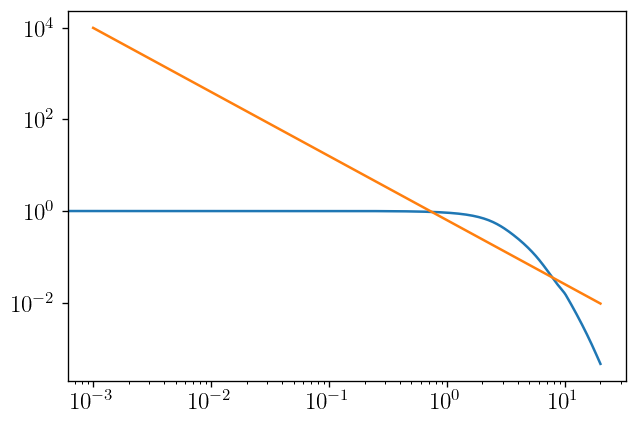

In [6]:
a = np.linspace(0.001, 20, 400)
plt.plot(np.linspace(-20, 20, 400), z[0,:,200]/np.max(z[0,:,200]))
plt.plot(a, 1e4*a**(-1.4)/np.max(a**(-1.4)))
plt.yscale('log')
plt.xscale('log')
#plt.ylim(1e-4, 1.1)

In [ ]:
plt.imshow(z[0], extent=(-20, 20, -20, 20))